# Teste de Estacionaridade

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## Criação da Série

In [11]:
# criando a semente aleatória e os valores
np.random.seed(10)
dados1 = np.random.normal(0,1,41)
dados1

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155])

In [12]:
# transformando em dataframe
dados1 = pd.DataFrame(dados1)
dados1.head()

,0
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336


In [13]:
# renomeando a coluna do dataframe
dados1.columns = ['valores']
dados1.head()

,valores
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336


In [14]:
# visualizando número de colunas e linhas
dados1.shape

(41, 1)

In [15]:
# criando os índices p ano
indice = pd.date_range('1980', periods = len(dados1), freq='Y') # por ano
indice

DatetimeIndex(['1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [16]:
# criando a séria
serie1 = pd.Series(dados1['valores'].values, index = indice)
serie1

1980-12-31    1.331587
1981-12-31    0.715279
1982-12-31   -1.545400
1983-12-31   -0.008384
1984-12-31    0.621336
1985-12-31   -0.720086
1986-12-31    0.265512
1987-12-31    0.108549
1988-12-31    0.004291
1989-12-31   -0.174600
1990-12-31    0.433026
1991-12-31    1.203037
1992-12-31   -0.965066
1993-12-31    1.028274
1994-12-31    0.228630
1995-12-31    0.445138
1996-12-31   -1.136602
1997-12-31    0.135137
1998-12-31    1.484537
1999-12-31   -1.079805
2000-12-31   -1.977728
2001-12-31   -1.743372
2002-12-31    0.266070
2003-12-31    2.384967
2004-12-31    1.123691
2005-12-31    1.672622
2006-12-31    0.099149
2007-12-31    1.397996
2008-12-31   -0.271248
2009-12-31    0.613204
2010-12-31   -0.267317
2011-12-31   -0.549309
2012-12-31    0.132708
2013-12-31   -0.476142
2014-12-31    1.308473
2015-12-31    0.195013
2016-12-31    0.400210
2017-12-31   -0.337632
2018-12-31    1.256472
2019-12-31   -0.731970
2020-12-31    0.660232
Freq: A-DEC, dtype: float64

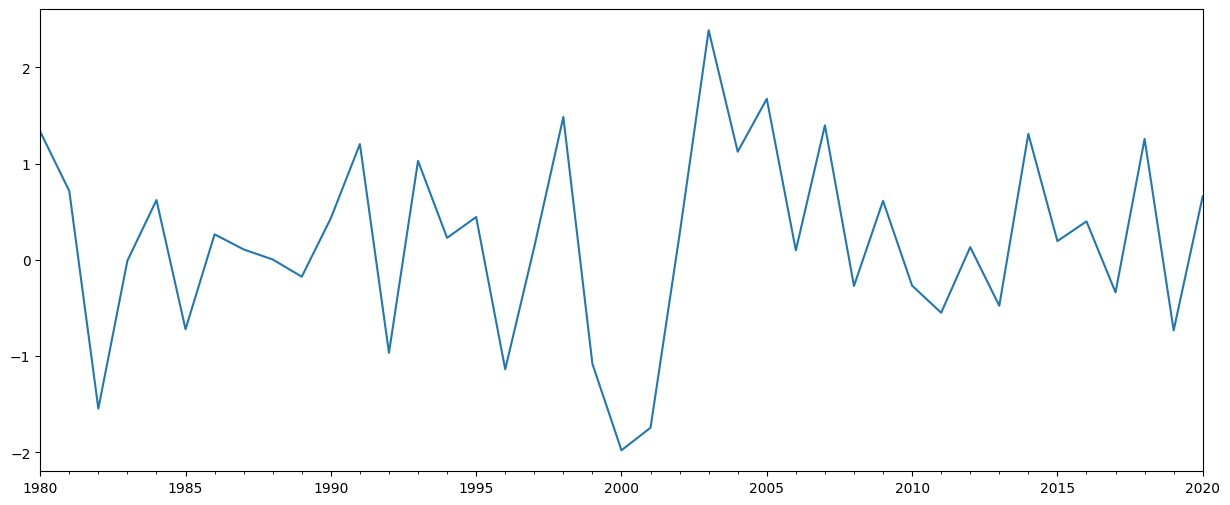

In [17]:
serie1.plot()
plt.show()

## Teste de Estacinoaridade

- Se houver a estacionaridade, o modelo dá previsões mais precisas

In [18]:
import statsmodels.tsa.stattools

### Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ha = não é estacionário: estatística do teste > valor crítico

Ho = é estacionário:  estatística do teste < valor críticoa

In [19]:
statsmodels.tsa.stattools.kpss(serie1)

C:\Users\Luiza\AppData\Local\Temp\ipykernel_12848\419759984.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statsmodels.tsa.stattools.kpss(serie1)


(0.0685962789581985,
 0.1,
 0,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [20]:
kpss = statsmodels.tsa.stattools.kpss(serie1)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('número de lags: {}'.format(kpss[2]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0686
p_valor: 0.1000
número de lags: 0
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\Luiza\AppData\Local\Temp\ipykernel_12848\3108268961.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie1)


In [21]:
df = statsmodels.tsa.stattools.adfuller(serie1)
print('Estatística do teste: {:.4f}'.format(df[0]))
print('p_valor: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatística do teste: -5.8642
p_valor: 0.00000034
Valores Críticos:
1%: -3.6056
5%: -2.9371
10%: -2.6070


### Teste df (Dickey Fuller)

Ha = não é estacionário: estatística do teste >= valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

In [22]:
df = statsmodels.tsa.stattools.adfuller(serie1)
print('Estatística do teste: {:.4f}'.format(df[0]))
print('p_valor: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatística do teste: -5.8642
p_valor: 0.00000034
Valores Críticos:
1%: -3.6056
5%: -2.9371
10%: -2.6070


## **Dataset importado**

**AirPassengers: dados clássicos da companhia aérea Box & Jenkins. Totais mensais de passageiros de companhias aéreas internacionais, 1949 a 1960.**


In [23]:
serie2 = pd.read_csv('AirPassengers.csv')

In [24]:
serie2 = pd.Series(serie2['#Passengers'].values, index = serie2['Month'])
serie2

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

In [ ]:
serie2.plot()
plt.show()

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ha = não é estacionário: estatística do teste > valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

In [ ]:
kpss2 = statsmodels.tsa.stattools.kpss(serie2, regression='ct')
print('Estatítica do teste: {:.4f}'.format(kpss2[0]))
print('p_valor: {:.4f}'.format(kpss2[1]))
print('Valores Críticos:')
for chave, valor in kpss2[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Teste df (Dickey Fuller)

Ha = não é estacionário: estatística do teste >= valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

In [ ]:
df2 = statsmodels.tsa.stattools.adfuller(serie2)
print('Estatítica do teste: {:.4f}'.format(df2[0]))
print('p_valor: {:.8f}'.format(df2[1]))
print('Valores Críticos:')
for chave, valor in df2[4].items():
   print('{}: {:.4f}'.format(chave, valor))